# **Diabetes Prediction Project** 🩺🔬

***
<div style="text-align: center;margin-left:150px">
    <img src="image.JPG" alt="Diabetes Prediction Illustration" style="width:800%; max-width: 700px;">
</div

 
## **Introduction**
Diabetes is a growing health concern, impacting millions worldwide. **Stark Health Clinic** is struggling to efficiently manage and prevent diabetes due to ineffective early detection methods. This project seeks to build a **robust machine learning model** to predict diabetes risk, enabling **early intervention** and improved patient care.

## **Project Goals**
- 📌 **Develop** a predictive model using machine learning.
- 📊 **Analyze** patient data to identify key risk factors.
- 🏥 **Empower** healthcare providers with data-driven insights.
- 🔍 **Improve** early detection and preventive measures.

## **Dataset**
The dataset contains patient information, including:
- Age, BMI, Glucose levels, Insulin, Blood Pressure, etc.
- Labels indicating whether a patient has diabetes.

## **Approach1.
2. **Data Preprocessing** to clean and handle missing value2.
3. **Feature Engineering** to extract meaningful insight3.
4. **Model Training & Evaluation** to ensure high accura 



***

In [19]:
# Import Dependencies

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

**Import Dataset**

In [21]:
path = "diabetes_prediction_dataset.csv"
diabetes_data = pd.read_csv(path)

In [22]:
diabetes_data.sample(4)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
57047,Male,37.0,0,0,current,27.32,3.5,159,0
49402,Male,56.0,0,0,never,24.20,5.7,300,1
43984,Female,66.0,0,0,No Info,38.88,6.6,140,0
90657,Female,45.0,0,0,No Info,49.68,6.2,159,0


In [23]:
diabetes_data.shape

(100000, 9)

9 columns and 100000 rows

**Data Preparation and Cleaning**

In [30]:
# Displaying basic info
print("Dataset Info:")
print(diabetes_data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [32]:
# Checking for missing values
print("\nMissing Values:")
print(diabetes_data.isnull().sum())


Missing Values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Dataset containes no missing values.

In [41]:
# Checking for duplicate rows
print("\nDuplicate Rows:", diabetes_data.duplicated().sum())


Duplicate Rows: 3854


I have 3,854 duplicate rows in my dataset

In [44]:
# Removing duplicate rows
df_cleaned = diabetes_data.drop_duplicates()

# Verifying that duplicates are removed
print("Duplicate Rows After Cleaning:", df_cleaned.duplicated().sum())

Duplicate Rows After Cleaning: 0


In [46]:
# Running the Summary statistics to check for any inconsistencies
print("\nSummary Statistics:")
df_cleaned.describe()


Summary Statistics:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In Age Column

- Minimum value is 0.08, which seems unrealistic (should be at least 1 year).
My solution is to replace values < 1 with the median or remove them.

In [49]:
# Traking away rows where age is less than 1
df_cleaned = df_cleaned[df_cleaned['age'] >= 1]

# Verifying the change
print("Minimum Age After Cleaning:", df_cleaned['age'].min())
print("Summary Statistics After Age Cleaning:")
print(df_cleaned['age'].describe())

Minimum Age After Cleaning: 1.0
Summary Statistics After Age Cleaning:
count    95236.000000
mean        42.188639
std         22.203090
min          1.000000
25%         24.000000
50%         43.000000
75%         60.000000
max         80.000000
Name: age, dtype: float64


In [51]:
# Checking for unique the values in categorical columns
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']
for col in categorical_cols:
    print(f"\nUnique values in {col}: {df_cleaned[col].unique()}")


Unique values in gender: ['Female' 'Male' 'Other']

Unique values in hypertension: [0 1]

Unique values in heart_disease: [1 0]

Unique values in smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']

Unique values in diabetes: [0 1]


In [53]:
# Handling "Other" in gender (droping them)
df_cleaned = df_cleaned[df_cleaned["gender"] != "Other"]  # If you want to remove

In [55]:
df_cleaned.shape

(95218, 9)

The term "ever" suggests that the person has smoked at some point in their life.
The category "former" typically means the person used to smoke but has quit.
Since "ever" doesn't specify if they still smoke or not, it makes sense to group it with "former", assuming they are not current smokers.

In [58]:
df_cleaned["smoking_history"] = df_cleaned["smoking_history"].replace({
    "not current": "former",  # This clearly means they quit
    "No Info": "unknown" 
})

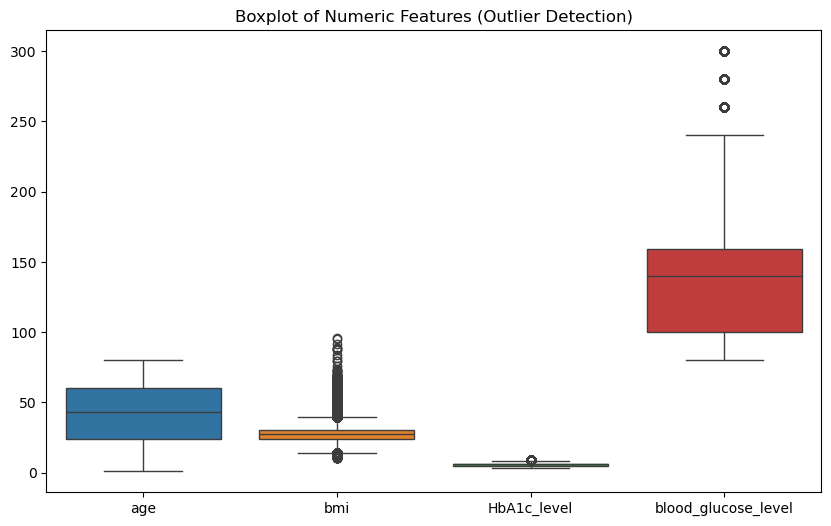

In [60]:
# Checking for outliers using boxplot (requires matplotlib & seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=df_cleaned[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
plt.title("Boxplot of Numeric Features (Outlier Detection)")
plt.show()

**The relationship between columns and diabetes**

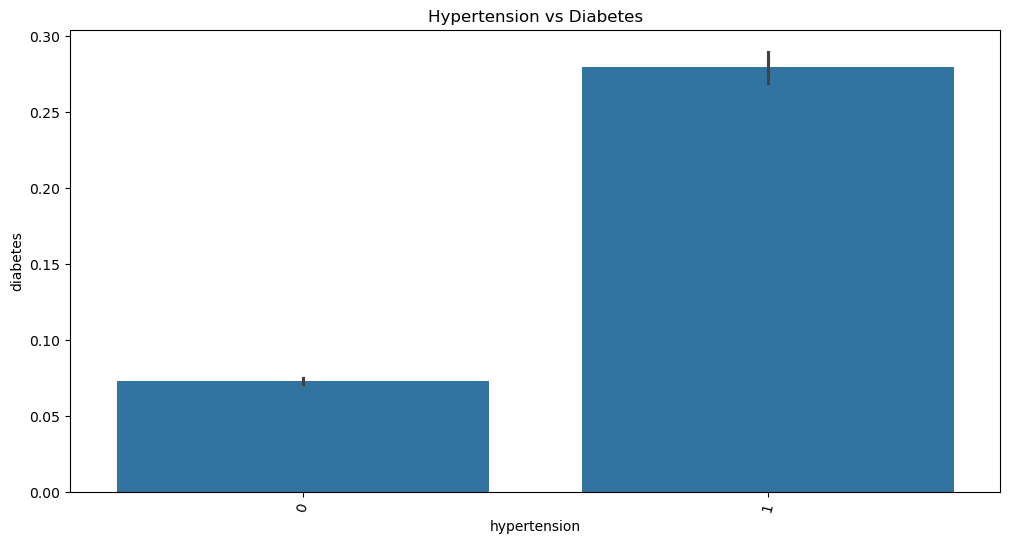

In [62]:
plt.figure(figsize=(12,6))
# to slant the country in x axis
plt.xticks(rotation=75)
plt.title("Hypertension vs Diabetes")
sns.barplot(x=df_cleaned.hypertension, y=df_cleaned.diabetes);

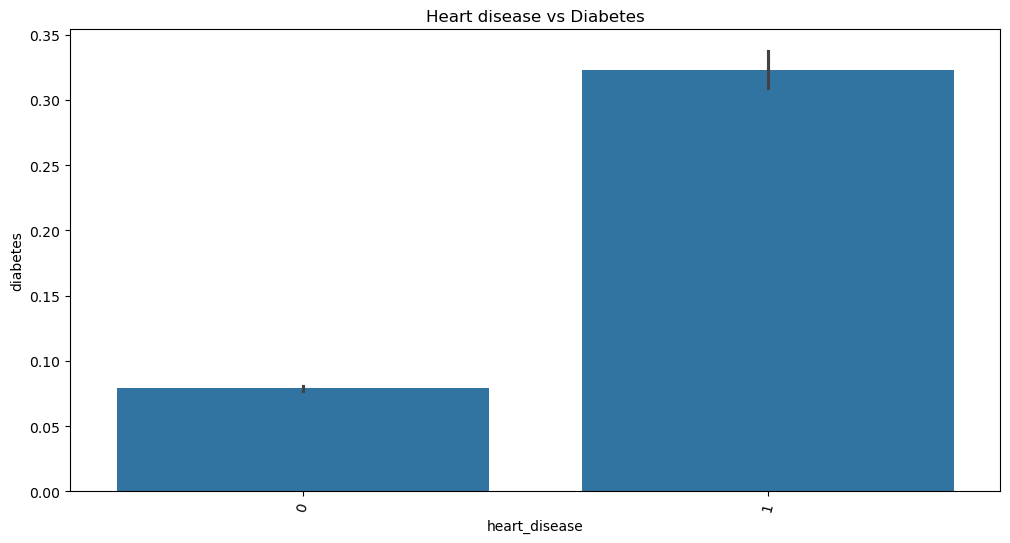

In [63]:
plt.figure(figsize=(12,6))
# to slant the country in x axis
plt.xticks(rotation=75)
plt.title("Heart disease vs Diabetes")
sns.barplot(x=df_cleaned.heart_disease, y=df_cleaned.diabetes);

**Checking Correlation**

In [65]:
df_cleaned.corr(numeric_only=True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.256476,0.238758,0.327955,0.105945,0.114294,0.263867
hypertension,0.256476,1.000000,0.119473,0.145839,0.081354,0.084802,0.195002
heart_disease,0.238758,0.119473,1.000000,0.059186,0.068112,0.070836,0.170201
bmi,0.327955,0.145839,0.059186,1.000000,0.083381,0.092202,0.213226
HbA1c_level,0.105945,0.081354,0.068112,0.083381,1.000000,0.173139,0.407839
blood_glucose_level,0.114294,0.084802,0.070836,0.092202,0.173139,1.000000,0.425607
diabetes,0.263867,0.195002,0.170201,0.213226,0.407839,0.425607,1.000000


HbA1c level (Hemoglobin A1c level) measures the average blood sugar (glucose) levels over the past 2–3 months. It is commonly used to diagnose and monitor diabetes and prediabetes.

**Strongest correlation with diabetes:**
- Blood glucose level (0.43) and HbA1c level (0.41) → These are expected since high glucose and HbA1c levels are direct indicators of diabetes.

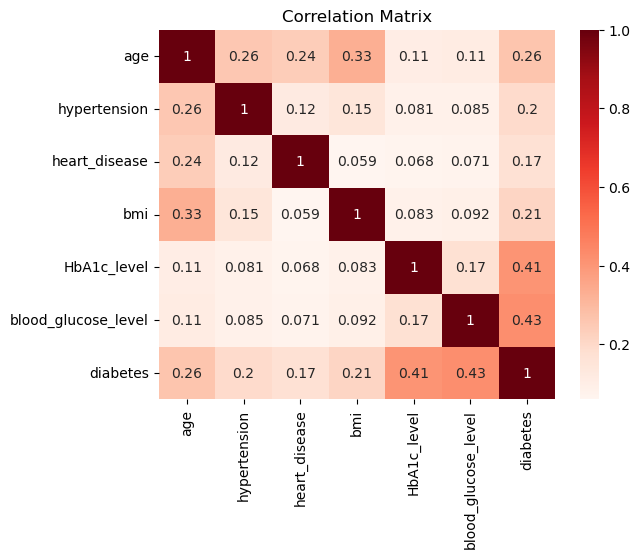

In [68]:
sns.heatmap(df_cleaned.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [101]:
# Splitting the data
train_df, temp_df = train_test_split(df_cleaned, test_size=0.3, random_state=42)  # 70% train, 30% temp
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)  # 15% val, 15% test

print('train_df.shape :', train_df.shape)
print('val_df.shape   :', val_df.shape)
print('test_df.shape  :', test_df.shape)

train_df.shape : (66652, 9)
val_df.shape   : (14283, 9)
test_df.shape  : (14283, 9)


In [90]:
train_df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
67789,Female,31.0,0,0,never,23.27,4.0,159,0
64143,Male,25.0,0,0,unknown,27.32,6.0,80,0


In [94]:
val_df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
98084,Female,43.0,0,0,never,22.61,5.0,155,0
37607,Male,8.0,0,0,never,22.60,6.2,80,0


In [96]:
test_df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
66906,Female,59.0,0,0,never,31.26,6.5,155,0
19667,Male,2.0,0,0,unknown,18.41,5.7,158,0


#### Identifying Input and Target Columns

In [99]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'diabetes'

In [103]:
print(input_cols)

['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']


In [105]:
target_col

'diabetes'

Creating inputs and targets for the training, validation and test sets for further processing and model training.

In [110]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [114]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [116]:
train_inputs.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
67789,31.0,0,0,never,23.27,4.0,159
64143,25.0,0,0,unknown,27.32,6.0,80
71111,18.0,0,0,never,28.65,5.7,145
7989,22.0,0,0,never,27.32,6.2,80
49723,28.0,0,0,never,27.32,5.7,158


In [118]:
train_targets

67789    0
64143    0
71111    0
7989     0
49723    0
        ..
6344     0
56741    0
80146    0
871      0
16071    1
Name: diabetes, Length: 66652, dtype: int64

In [120]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [126]:
train_inputs[numeric_cols]

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
67789,31.0,0,0,23.27,4.0,159
64143,25.0,0,0,27.32,6.0,80
71111,18.0,0,0,28.65,5.7,145
7989,22.0,0,0,27.32,6.2,80
49723,28.0,0,0,27.32,5.7,158
...,...,...,...,...,...,...
6344,26.0,0,0,27.32,3.5,159
56741,34.0,0,0,28.69,4.8,100
80146,34.0,0,0,19.69,4.8,145
871,59.0,1,0,29.28,3.5,158


In [124]:
train_inputs[categorical_cols].nunique()

smoking_history    5
dtype: int64

#### Scaling Numeric Features

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [133]:
scaler = MinMaxScaler()

In [135]:
scaler = MinMaxScaler()

In [139]:
scaler.fit(df_cleaned[numeric_cols])

MinMaxScaler()

In [141]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[1.0, 0.0, 0.0, 10.01, 3.5, 80.0]

In [143]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[80.0, 1.0, 1.0, 95.69, 9.0, 300.0]

In [149]:
train_inputs = train_df[input_cols].copy()
val_inputs = val_df[input_cols].copy()
test_inputs = test_df[input_cols].copy()

In [151]:
# Fitting the scaler on training numeric features and transform
train_inputs[numeric_cols] = scaler.fit_transform(train_inputs[numeric_cols])

# Transforming validation and test sets using the same scaler
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

#### Encoding Categorical Data

In [160]:
df_cleaned[categorical_cols].nunique()

smoking_history    5
dtype: int64

In [168]:
from sklearn.preprocessing import OneHotEncoder

In [172]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [176]:
encoder.fit(df_cleaned[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [180]:
encoder.categories_

[array(['current', 'ever', 'former', 'never', 'unknown'], dtype=object)]

In [184]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_unknown']


In [186]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [188]:
pd.set_option('display.max_columns', None)

In [190]:
test_inputs.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_unknown
66906,0.734177,0.0,0.0,never,0.248016,0.545455,0.340909,0.0,0.0,0.0,1.0,0.0
19667,0.012658,0.0,0.0,unknown,0.098039,0.400000,0.354545,0.0,0.0,0.0,0.0,1.0
93803,1.000000,1.0,1.0,never,0.172035,0.563636,0.545455,0.0,0.0,0.0,1.0,0.0
68195,0.443038,0.0,0.0,never,0.192460,0.545455,0.363636,0.0,0.0,0.0,1.0,0.0
90426,0.784810,0.0,0.0,unknown,0.202031,0.454545,0.340909,0.0,0.0,0.0,0.0,1.0


In [194]:
train_targets = train_df[target_col].copy()
val_targets = val_df[target_col].copy()
test_targets = test_df[target_col].copy()

# Print the shapes
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (66652, 12)
train_targets: (66652,)
val_inputs: (14283, 12)
val_targets: (14283,)
test_inputs: (14283, 12)
test_targets: (14283,)


In [198]:
val_targets

98084    0
37607    0
89229    0
89622    0
17383    0
        ..
65757    0
30936    0
61449    0
96383    0
289      0
Name: diabetes, Length: 14283, dtype: int64

### Training a Logistic Regression Model

In [205]:
from sklearn.linear_model import LogisticRegression

In [207]:
model = LogisticRegression(solver='liblinear')

In [209]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [211]:
print(numeric_cols + encoded_cols)

['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_unknown']


In [213]:
print(model.coef_.tolist())

[[3.488104718930404, 0.7030431101017779, 0.703787444892999, 6.458318845884151, 11.832681810582269, 7.002381802442294, -2.200502245760531, -2.224883489881743, -2.316821794693425, -2.3588136217629634, -2.804692404000058]]


In [215]:
print(model.intercept_)

[-11.90571356]


### Making Predictions and Evaluating the Model

In [220]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [222]:
train_preds = model.predict(X_train)

In [224]:
train_preds

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [226]:
train_targets

67789    0
64143    0
71111    0
7989     0
49723    0
        ..
6344     0
56741    0
80146    0
871      0
16071    1
Name: diabetes, Length: 66652, dtype: int64

In [228]:
train_probs = model.predict_proba(X_train)
train_probs

array([[9.99763716e-01, 2.36284247e-04],
       [9.99058842e-01, 9.41158454e-04],
       [9.95067345e-01, 4.93265506e-03],
       ...,
       [9.99262951e-01, 7.37049482e-04],
       [9.99110022e-01, 8.89977618e-04],
       [1.81070151e-04, 9.99818930e-01]])

In [230]:
model.classes_

array([0, 1], dtype=int64)

In [232]:
from sklearn.metrics import accuracy_score

In [234]:
accuracy_score(train_targets, train_preds)

0.9580807777711097

In [236]:
from sklearn.metrics import confusion_matrix

In [238]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.99150198, 0.00849802],
       [0.38401888, 0.61598112]])

In [240]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 95.81%


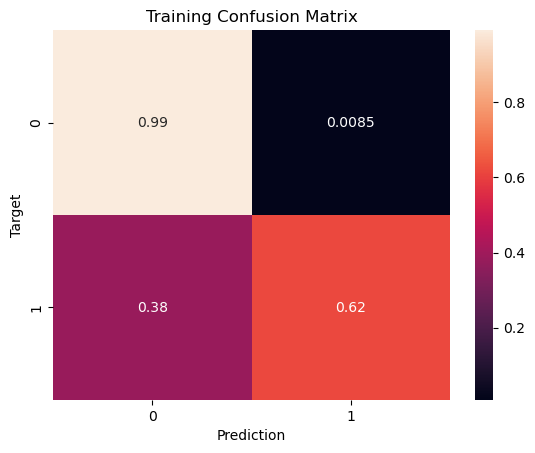

In [242]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 95.85%


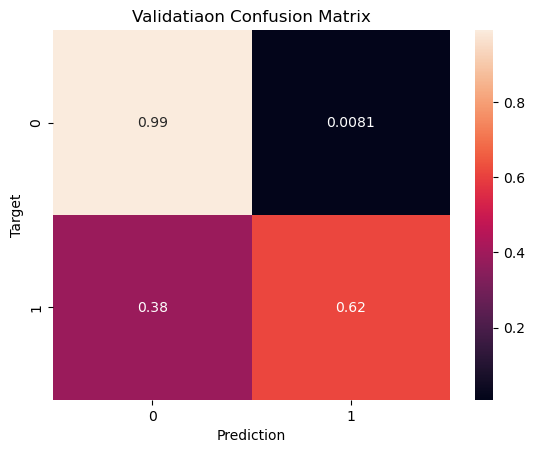

In [244]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 96.11%


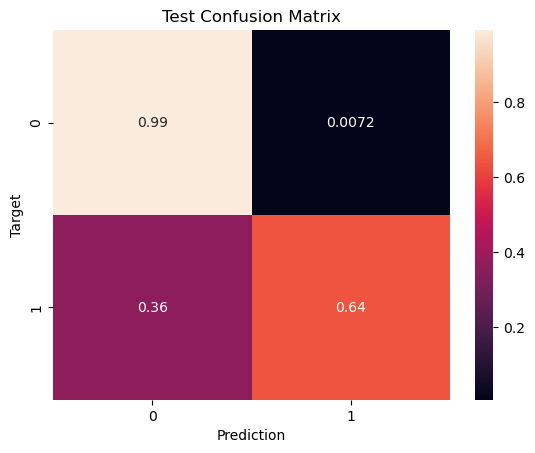

In [246]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

In [266]:
def random_guess(inputs):
    return np.random.choice([0, 1], len(inputs))

In [270]:
def all_no(inputs):
    return np.full(len(inputs), 0)

In [272]:
accuracy_score(test_targets, random_guess(X_test))

0.49835468739060423

In [274]:
accuracy_score(test_targets, all_no(X_test))

0.9102429461597703

### Making Predictions on a Single Input

In [277]:
import numpy as np  

new_input = {
    'gender': 'Male',
    'age': 45.0,
    'hypertension': 0,
    'heart_disease': 0,
    'smoking_history': 'current',
    'bmi': 28.5,
    'HbA1c_level': 5.8,
    'blood_glucose_level': 180
}

print(new_input)

{'gender': 'Male', 'age': 45.0, 'hypertension': 0, 'heart_disease': 0, 'smoking_history': 'current', 'bmi': 28.5, 'HbA1c_level': 5.8, 'blood_glucose_level': 180}


In [279]:
new_input_df = pd.DataFrame([new_input])

In [281]:
new_input_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Male,45.0,0,0,current,28.5,5.8,180


In [285]:
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

In [287]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_unknown
0,0.556962,0.0,0.0,0.215803,0.418182,0.454545,1.0,0.0,0.0,0.0,0.0


In [289]:
prediction = model.predict(X_new_input)[0]

In [291]:
prediction

0

In [293]:
prob = model.predict_proba(X_new_input)[0]

In [295]:
prob

array([0.93330713, 0.06669287])

In [301]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [306]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    
    # Convert 0 → "False", 1 → "True"
    pred_label = "True" if pred == 1 else "False"
    
    return pred_label, prob

# Example usage
result = predict_input(new_input)
print(result)  

('False', 0.9333071259744812)


### The model predicts that the person does not have diabetes with 93.33% confidence.